# Extended Figure 7

In [1]:
# TODO: pending creating plots.py and maybe load_data.py; ordering things, some stuff is repeated

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import re
import matplotlib.patches as patches
import sys
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D
from PIL import Image
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm

tqdm.pandas()

sys.path.append('../..') 
sys.path.append('../../main/Fig1') 
from consensus_variables import * 
from plot_f1 import *

In [4]:
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125

In [5]:
cluster_dir = "/data/bbg"

# artifacts_analysis_dir = os.path.join(deepcsa_run_dir, "errorinjection")
artifacts_analysis_dir = "/scratch/bbg/20250530_bladder_errorinjection" #should be moved to the folder above but there was no space
botseq_profile_file = os.path.join(cluster_dir, "projects/bladder_ts/data/nanoseq/botseq_cordblood_mutprofile.tsv") # TODO: add these files in the repo outside of deepcsa run data

In [6]:
artifacts = ["SBS43", "SBS45", "SBS52", "SBS58"]

## Fig 7a: error injection results ilustration: RBM10 BotSeq

In [7]:
nmuts_ordered_genes = [
  # "TERTpromoter",
 # 'PIK3CA',
 'FGFR3',
 'TP53',
 'RB1',
 'KMT2C',
 'CDKN1A',
 'FOXQ1',
 'NOTCH2',
 'STAG2',
 'CREBBP',
 'EP300',
 'RBM10',
 'ARID1A',
 'KDM6A',
 'KMT2D',
 'ALL_GENES']
impacts = ["truncating", "missense"]
omegas = ["1", "2", "5", "10", "50"]
error_rates = ["0","1e-09","5e-09","1e-08","3e-08","5e-08","7e-08","9e-08","1e-07"]

In [8]:
omega_palette = {"1": "#B8E4EC",
                "2": "#9AB8F5",
                "5": "#80A9FF",
                "10": "#0078BD",
                "50": "#00315C"}
artifacts = ["SBS43", "SBS45", "SBS52", "SBS58", "BOTSEQ_ARTIFACT"]

In [9]:
cmap = cm.get_cmap("coolwarm")
norm = np.linspace(0.2, 0.8, len(error_rates))  # Avoid very dark colors

# Create dictionary with colors
errorrate_palette = {key: cmap(n) for key, n in zip(error_rates, norm)}
errorrate_palette

{'0': (0.48385432959999997, 0.6220498496, 0.9748082026, 1.0),
 '1e-09': (0.5869210038431373, 0.7181213123921568, 0.9988741138823529, 1.0),
 '5e-09': (0.6881884831921569, 0.7931783792980391, 0.9880381043568628, 1.0),
 '1e-08': (0.7820491171058823, 0.8428642126588235, 0.9429798432705883, 1.0),
 '3e-08': (0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0),
 '5e-08': (0.933221183, 0.8155568504470588, 0.7531514321411764, 1.0),
 '7e-08': (0.9658988981882353, 0.7401418386039216, 0.6370577074156862, 1.0),
 '9e-08': (0.9649113881372549, 0.6401590780588234, 0.5198055987058824, 1.0),
 '1e-07': (0.9318312966, 0.5190855232, 0.4064796086, 1.0)}

In [10]:
# load results for all_samples
samples = ["all_samples"]
artifacts = ["SBS43", "SBS45", "SBS52", "SBS58", "BOTSEQ_ARTIFACT"]

res_dfs = []
for parentdir in os.listdir(artifacts_analysis_dir):
    if parentdir in artifacts:
        artifact = parentdir
        for sample in samples:
            for childir in tqdm(os.listdir(os.path.join(artifacts_analysis_dir, artifact, sample, "omega"))):
                
                omega = int(childir.split("_")[0][5:])
                errorate = childir.split("_")[1][8:]
            
                for file in os.listdir(os.path.join(artifacts_analysis_dir, artifact, sample, "omega", childir)):
                    if file != "preprocessing":
                        try:
                            res_df = pd.read_csv(os.path.join(artifacts_analysis_dir, artifact, sample, "omega", childir, file), sep = "\t")
                            res_df["groundtruth_omega"] = omega
                            if errorate == "24e-08":
                                    errorate = 2.4e-8
                            res_df["errorate"] = errorate
                            res_df["replicate"] = int(file.split(".")[2].split("_")[1])+1
                            res_df["artifact"] = artifact
                            res_dfs.append(res_df)
                        except pd.errors.EmptyDataError:
                            print(os.path.join(artifacts_analysis_dir, artifact, sample, "omega", childir, file))

omega_synsamples_res_df = pd.concat(res_dfs, ignore_index = True)
omega_synsamples_res_df = omega_synsamples_res_df.loc[omega_synsamples_res_df["impact"].isin(impacts)]
omega_synsamples_res_df

100%|███████████████████████████████████████████| 50/50 [01:07<00:00,  1.35s/it]


,gene,sample,impact,mutations,dnds,pvalue,lower,upper,groundtruth_omega,errorate,replicate,artifact
0,EP300,all_samples,missense,727,0.928223,0.173573,0.834966,1.032593,1,0,58,BOTSEQ_ARTIFACT
4,EP300,all_samples,truncating,109,0.988965,0.926876,0.775772,1.251416,1,0,58,BOTSEQ_ARTIFACT
8,STAG2,all_samples,missense,391,1.131250,0.065577,0.992189,1.286890,1,0,58,BOTSEQ_ARTIFACT
12,STAG2,all_samples,truncating,63,1.027734,0.845102,0.774295,1.343286,1,0,58,BOTSEQ_ARTIFACT
16,NOTCH2,all_samples,missense,629,0.925195,0.176616,0.826883,1.035059,1,0,58,BOTSEQ_ARTIFACT
...,...,...,...,...,...,...,...,...,...,...,...,...
3161987,FGFR3,all_samples,missense,6610,34.656250,0.000000,32.179479,37.354614,50,1e-07,87,SBS58
3161991,FGFR3,all_samples,truncating,894,39.724976,0.000000,35.113903,44.987427,50,1e-07,87,SBS58
3161995,TERTpromoter,all_samples,missense,62,41.125146,0.000000,29.759760,56.226465,50,1e-07,87,SBS58
3161997,ALL_GENES,all_samples,missense,372996,38.987109,0.000000,36.615272,41.571338,50,1e-07,87,SBS58


In [11]:
# reduction of omega measured as the proportion of reconstructed dnds
omega_synsamples_res_df["prop_reconstructed_dnds"] = 100 * omega_synsamples_res_df["dnds"] / omega_synsamples_res_df["groundtruth_omega"]
omega_synsamples_res_df

,gene,sample,impact,mutations,dnds,pvalue,lower,upper,groundtruth_omega,errorate,replicate,artifact,prop_reconstructed_dnds
0,EP300,all_samples,missense,727,0.928223,0.173573,0.834966,1.032593,1,0,58,BOTSEQ_ARTIFACT,92.822266
4,EP300,all_samples,truncating,109,0.988965,0.926876,0.775772,1.251416,1,0,58,BOTSEQ_ARTIFACT,98.896484
8,STAG2,all_samples,missense,391,1.131250,0.065577,0.992189,1.286890,1,0,58,BOTSEQ_ARTIFACT,113.125000
12,STAG2,all_samples,truncating,63,1.027734,0.845102,0.774295,1.343286,1,0,58,BOTSEQ_ARTIFACT,102.773438
16,NOTCH2,all_samples,missense,629,0.925195,0.176616,0.826883,1.035059,1,0,58,BOTSEQ_ARTIFACT,92.519531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161987,FGFR3,all_samples,missense,6610,34.656250,0.000000,32.179479,37.354614,50,1e-07,87,SBS58,69.312500
3161991,FGFR3,all_samples,truncating,894,39.724976,0.000000,35.113903,44.987427,50,1e-07,87,SBS58,79.449951
3161995,TERTpromoter,all_samples,missense,62,41.125146,0.000000,29.759760,56.226465,50,1e-07,87,SBS58,82.250293
3161997,ALL_GENES,all_samples,missense,372996,38.987109,0.000000,36.615272,41.571338,50,1e-07,87,SBS58,77.974219


In [12]:
omega_synsamples_res_df["errorate"] = omega_synsamples_res_df["errorate"].astype(str)
omega_synsamples_res_df = omega_synsamples_res_df.loc[omega_synsamples_res_df["errorate"] != "2.4e-08"]
omega_synsamples_res_df["errorate"].unique()

array(['0', '1e-09', '5e-09', '1e-08', '3e-08', '5e-08', '7e-08', '9e-08',
       '1e-07'], dtype=object)

In [13]:
omega_synsamples_res_df["groundtruth_omega"] = omega_synsamples_res_df["groundtruth_omega"].astype(str)
omega_synsamples_res_df["groundtruth_omega"].unique()

/tmp/ipykernel_3021456/1056011481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omega_synsamples_res_df["groundtruth_omega"] = omega_synsamples_res_df["groundtruth_omega"].astype(str)


array(['1', '2', '5', '10', '50'], dtype=object)

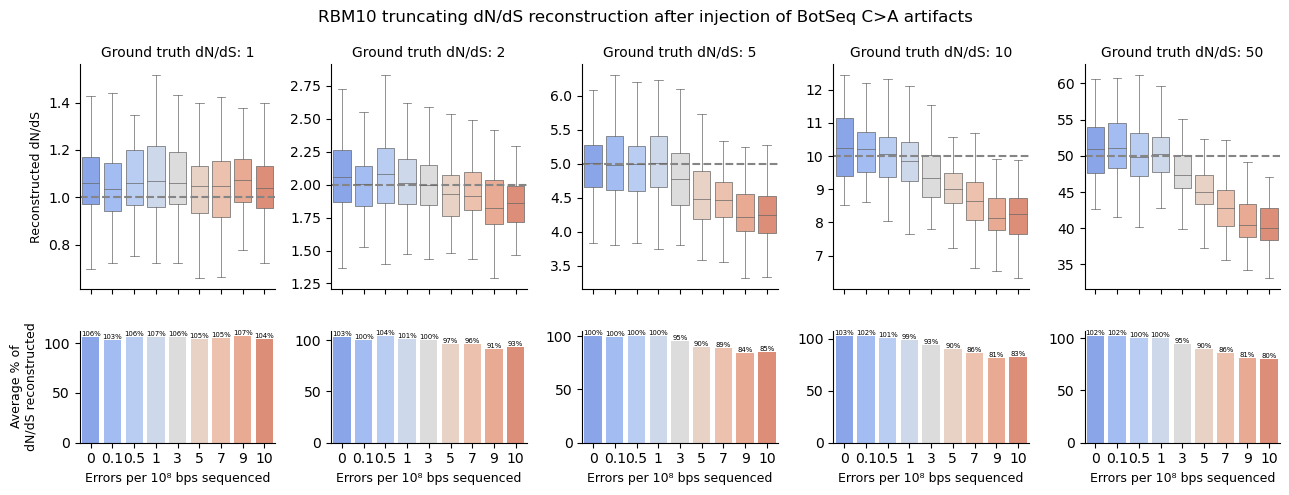

In [14]:
gene_expl = "RBM10"
impact_expl = "truncating"
artifact_expl = "BOTSEQ_ARTIFACT"
artifact_title = "BotSeq C>A"

fig, axs = plt.subplots(2, len(omegas), figsize = (13, 5), sharex = True,  gridspec_kw={"height_ratios": [2, 1]})
fig.suptitle(f"{gene_expl} truncating dN/dS reconstruction after injection of {artifact_title} artifacts")

plot_df = omega_synsamples_res_df.loc[(omega_synsamples_res_df["gene"] == gene_expl) &
                                    (omega_synsamples_res_df["impact"] == impact_expl) &
                                    (omega_synsamples_res_df["artifact"] == artifact_expl)]

# top plots
i = 0
for j, w in enumerate(omegas):
    sns.boxplot(plot_df.loc[plot_df["groundtruth_omega"] == w],
                x = "errorate", y = "dnds",
                order = error_rates, 
                palette = errorrate_palette, ax = axs[i,j],
                showfliers = False, linewidth = 0.5)
    # sns.stripplot(plot_df.loc[plot_df["groundtruth_omega"] == w],
    #             x = "errorate", y = "dnds",
    #             order = error_rates, 
    #             palette = errorrate_palette, ax = axs[i,j],
    #             alpha = 0.5,)
    axs[i,j].axhline(y = int(w), color = "#858585", linestyle = "--")

    axs[i,j].set_xlabel("")
    axs[i,j].set_ylabel("")
    axs[i,j].set_title(f"Ground truth dN/dS: {w}", fontsize = 10)
    axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"])
    if j == 0:
        axs[i,j].set_ylabel("Reconstructed dN/dS", fontsize = 9)
    # axs[i,j].legend_.remove()
    axs[i,j].spines["top"].set_visible(False)
    axs[i,j].spines["right"].set_visible(False)

# bottom plots
i += 1
for j, w in enumerate(omegas):
    sns.barplot(plot_df.loc[plot_df["groundtruth_omega"] == w].groupby(
        "errorate")["prop_reconstructed_dnds"].median().to_frame("median_prop_reconstructed_dnds").reset_index(),
                x = "errorate", y = "median_prop_reconstructed_dnds",
                order = error_rates, 
                palette = errorrate_palette, ax = axs[i,j]
                )

    axs[i,j].set_xlabel("Errors per 10⁸ bps sequenced", fontsize = 9)
    axs[i,j].set_ylabel("")
    axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"])
    if j == 0:
        axs[i,j].set_ylabel("Average % of\ndN/dS reconstructed", fontsize = 9)
    # axs[i,j].legend_.remove()
    axs[i,j].spines["top"].set_visible(False)
    axs[i,j].spines["right"].set_visible(False)

    for p in axs[i,j].patches:
        height = p.get_height()
        axs[i,j].text(p.get_x() + p.get_width() / 2, height, f"{height:.0f}%", 
                ha="center", va="bottom", fontsize=5)

# legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["0"], markersize=8, label='0'),
#               Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["1e-09"], markersize=8, label='0.1'),
#                      Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["5e-09"], markersize=8, label='0.5'),
#                      Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["1e-08"], markersize=8, label='1'),
#                      Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["3e-08"], markersize=8, label='3'),
#                  Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["5e-08"], markersize=8, label='5'),
#                  Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["7e-08"], markersize=8, label='7'),
#                  Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["9e-08"], markersize=8, label='9'),
#                  Line2D([0], [0], marker='o', color='w', markerfacecolor=errorrate_palette["1e-07"], markersize=8, label='10')]
# legend = fig.legend(handles=legend_handles, title="Errors per \n10⁸ bp sequenced", loc='upper right', bbox_to_anchor=(1.08, 0.9), fontsize=7,
#       title_fontsize = 8, ncols = 2, frameon = False, alignment = "center")
# legend.get_title().set_ha('center')  
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
plt.savefig(f"figs/extFig7a.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## Fig 7b: error injection results

In [15]:
artifacts_palette = sns.color_palette("pastel", len(artifacts))
artifacts_palette = dict(zip(artifacts, artifacts_palette))
artifacts_palette

{'SBS43': (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 'SBS45': (1.0, 0.7058823529411765, 0.5098039215686274),
 'SBS52': (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 'SBS58': (1.0, 0.6235294117647059, 0.6078431372549019),
 'BOTSEQ_ARTIFACT': (0.8156862745098039, 0.7333333333333333, 1.0)}

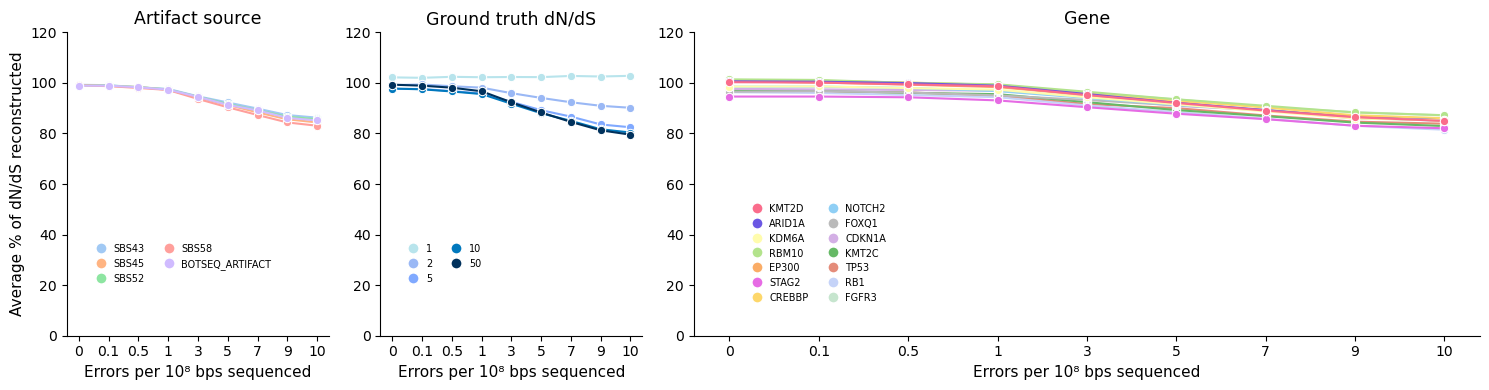

In [16]:
excluded_genes = ["TERTpromoter", "PIK3CA", "ALL_GENES"]
plot_df = omega_synsamples_res_df.loc[~(omega_synsamples_res_df["gene"].isin(excluded_genes))]

variables2plot = ["artifact", "groundtruth_omega", "gene"]
variables2plot_order = [artifacts, omegas, nmuts_ordered_genes]
variables2plot_colors = [artifacts_palette, omega_palette, gene2color]
variable2plot_title = ["Artifact source", "Ground truth dN/dS", "Gene"]
fig, axs = plt.subplots(1, len(variables2plot), figsize = (15, 4), sharey = False,
                       gridspec_kw = {'width_ratios': [1, 1, 3]})

for i, (var, order, palette, title) in enumerate(zip(variables2plot, variables2plot_order, variables2plot_colors, variable2plot_title)):

    plot_df_gpby = plot_df.groupby(
        ["errorate", var])["prop_reconstructed_dnds"].median().to_frame("median_prop_reconstructed_dnds").reset_index()
    plot_df_gpby["errorate"] = pd.Categorical(plot_df_gpby["errorate"], categories = error_rates, ordered = True)
    
    sns.lineplot(plot_df_gpby,
                x = "errorate", y = "median_prop_reconstructed_dnds", hue = var, 
                hue_order = order, marker = "o",
                palette = palette, ax = axs[i]
                )
    
    axs[i].set_xlabel("Errors per 10⁸ bps sequenced", fontsize = 11)
    axs[i].set_ylabel("")
    axs[i].set_title(title, fontsize = 12.5)
    axs[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    axs[i].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"])
    axs[i].set_ylim(0, 120)  # Set y-axis limits
    if i == 0:
        axs[i].set_ylabel("Average % of dN/dS reconstructed", fontsize = 11)
    axs[i].legend_.remove()
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)

    legend_handles = []
    for categ in palette:
        if categ in plot_df_gpby[var].unique():
            legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[categ], markersize=8, label=categ))

    if var == "artifact":
        legend_pos = (0.19, 0.4)
    elif var == "groundtruth_omega":
        legend_pos = (0.33, 0.4)
    elif var == "gene":
        legend_pos = (0.6, 0.5)
    legend = fig.legend(handles=legend_handles, title="", loc='upper right', bbox_to_anchor=legend_pos, fontsize=7,
          title_fontsize = 8, ncols = 2, frameon = False, alignment = "center")
    legend.get_title().set_ha('center')  

plt.tight_layout()
plt.savefig(f"figs/extFig7b.png", dpi = 300, bbox_inches = 'tight')

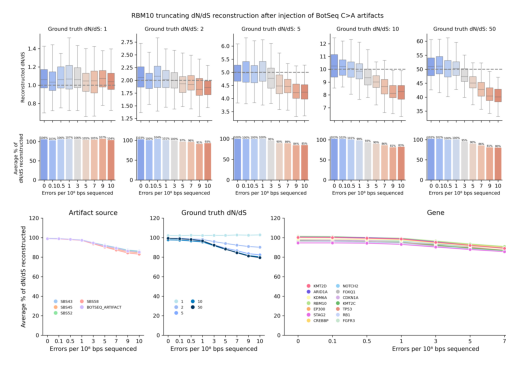

In [17]:
fig_up = Image.open("figs/extFig7a.png")
fig_down = Image.open("figs/extFig7b.png")
sep_rows = 50

fig_height = fig_up.height + fig_down.height + sep_rows
fig_width = fig_up.width
canvas = Image.new('RGB', (fig_width, fig_height), 'white')

# top
width = 0
height = 0
canvas.paste(fig_up, (width, height))

# bottom
width = 55
height += fig_up.height + sep_rows
canvas.paste(fig_down, (width, height))

plt.imshow(canvas)
plt.axis('off')
canvas.save("figs/extFig7.png")
plt.show()